# Esperanza's Development Notebook - NEW Version

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import prophet as Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
# test import - not required for this version of data
#import brickschema

In [ ]:
# Prophet import gives: "Importing plotly failed. Interactive plots will not work."
# We're not using interactive plots so it should be fine but I'm not sure
# Imported plotly and still getting the error

## Grabbing Data from Data/Out

In [2]:
# this path is based on my workflow with virtual environment - path will need to be changed

# floor_data = pd.read_csv('Capstone-Brick-Modeling/data/temp/combined_floors.csv')

In [32]:
#col_list = ['time', 'Common Setpoint', 'Actual Sup Flow SP', 'Zone Temperature', 'Actual Supply Flow', 'Outside Air Temp', 'Humidity', 'energy']

floor_2 = pd.read_csv('merged_all_2F.csv', index_col = 'Unnamed: 0')
floor_3 = pd.read_csv('merged_all_3F.csv', index_col = 'Unnamed: 0')
floor_4 = pd.read_csv('merged_all_4F.csv', index_col = 'Unnamed: 0')

In [3]:
# one version of this is Unnamed: 0.2 but I'm not sure why this one says 

#floor_2 = floor_2.drop(['Unnamed: 0.1', 'Unnamed: 0.1.1'], axis = 1)

In [33]:
floor_2.shape

(260245, 15)

In [34]:
floor_2.drop_duplicates().shape

(260245, 15)

In [26]:
floor_2.head(5)

,Unnamed: 0.1,Unnamed: 0.1.1,time,Common Setpoint,Actual Sup Flow SP,Zone Temperature,Actual Supply Flow,energy,Outside Air Temp,Humidity,Zone Temperature Next,Actual Supply Flow Next,Outside Air Temp Next,Humidity Next,energy Next
0,0,0,2018-01-03T20:57:39+00:00,72.5,330.0,75.2,318.73,10.109642,68.44,56.0,75.2,317.06,68.50,56.0,10.113301
1,1,1,2018-01-03T21:04:13+00:00,72.5,330.0,75.2,317.06,10.113301,68.50,56.0,75.7,314.34,68.25,56.0,10.099466
2,2,2,2018-01-03T21:10:44+00:00,72.5,330.0,75.7,314.34,10.099466,68.25,56.0,75.7,313.91,68.31,56.0,10.241028
3,3,3,2018-01-03T21:17:16+00:00,72.5,330.0,75.7,313.91,10.241028,68.31,56.0,75.7,318.31,68.44,57.0,10.187620
4,4,4,2018-01-03T21:23:44+00:00,72.5,330.0,75.7,318.31,10.187620,68.44,57.0,75.7,316.65,68.81,57.0,10.194055


In [48]:
new_group_index = floor_2.loc[(floor_2['Unnamed: 0.1'] == 0) & (floor_2['Unnamed: 0.1.1'] == 0)].index
test_series = pd.Series(new_group_index)

In [49]:
s1 = pd.Series(dict((v,k) for k,v in test_series.iteritems()))

In [50]:
s1

0        486
437        1
859        2
1291       3
1608       4
        ... 
58201    591
58328    592
58896    593
59482    594
60070    595
Length: 595, dtype: int64

In [51]:
s1.values

array([486,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [39]:
pd.Series(floor_2.index).duplicated().value_counts()

False    199594
True      60651
dtype: int64

In [27]:
dataframe_0 = floor_2.loc[floor_2['Unnamed: 0.1'] == 0].loc[:, 'Unnamed: 0.1']
dataframe_0 = dataframe_0.reset_index().reset_index().rename({'level_0': 'group'}, axis = 1).set_index('index').drop(['Unnamed: 0.1'], axis = 1)
dataframe_0.head(5)

,group
index,
0,0
437,1
859,2
1291,3
1608,4


In [43]:
dataframe_0.shape

(596, 1)

In [31]:
dataframe_0['group'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [28]:
floor_2_updated = floor_2.merge(dataframe_0, how = 'left', left_index = True, right_index = True)

In [29]:
floor_2_updated.head()

,Unnamed: 0.1,Unnamed: 0.1.1,time,Common Setpoint,Actual Sup Flow SP,Zone Temperature,Actual Supply Flow,energy,Outside Air Temp,Humidity,Zone Temperature Next,Actual Supply Flow Next,Outside Air Temp Next,Humidity Next,energy Next,group
0,0,0,2018-01-03T20:57:39+00:00,72.5,330.00,75.20,318.73,10.109642,68.44,56.0,75.20,317.06,68.50,56.0,10.113301,0.0
0,0,0,2018-01-03T20:57:39+00:00,72.5,330.00,75.20,318.73,10.109642,68.44,56.0,75.20,317.06,68.50,56.0,10.113301,486.0
0,0,0,2017-07-31T13:37:15+00:00,72.0,469.77,72.93,472.65,15.568162,68.63,60.0,72.93,468.02,68.44,60.0,14.919849,0.0
0,0,0,2017-07-31T13:37:15+00:00,72.0,469.77,72.93,472.65,15.568162,68.63,60.0,72.93,468.02,68.44,60.0,14.919849,486.0
1,1,1,2018-01-03T21:04:13+00:00,72.5,330.00,75.20,317.06,10.113301,68.50,56.0,75.70,314.34,68.25,56.0,10.099466,NaN


In [13]:
floor_2.loc[floor_2['Unnamed: 0.1'] == 0, 'group'] = floor_2.loc[floor_2['Unnamed: 0.1'] == 0].reset_index().reset_index()['level_0']

In [53]:
resetted = floor_2_updated.reset_index()

In [54]:
resetted.head()

,index,Unnamed: 0.1,Unnamed: 0.1.1,time,Common Setpoint,Actual Sup Flow SP,Zone Temperature,Actual Supply Flow,energy,Outside Air Temp,Humidity,Zone Temperature Next,Actual Supply Flow Next,Outside Air Temp Next,Humidity Next,energy Next,group
0,0,0,0,2018-01-03T20:57:39+00:00,72.5,330.00,75.20,318.73,10.109642,68.44,56.0,75.20,317.06,68.50,56.0,10.113301,0.0
1,0,0,0,2018-01-03T20:57:39+00:00,72.5,330.00,75.20,318.73,10.109642,68.44,56.0,75.20,317.06,68.50,56.0,10.113301,486.0
2,0,0,0,2017-07-31T13:37:15+00:00,72.0,469.77,72.93,472.65,15.568162,68.63,60.0,72.93,468.02,68.44,60.0,14.919849,0.0
3,0,0,0,2017-07-31T13:37:15+00:00,72.0,469.77,72.93,472.65,15.568162,68.63,60.0,72.93,468.02,68.44,60.0,14.919849,486.0
4,1,1,1,2018-01-03T21:04:13+00:00,72.5,330.00,75.20,317.06,10.113301,68.50,56.0,75.70,314.34,68.25,56.0,10.099466,NaN


In [ ]:
# something really strange is going on with data cleaning

In [56]:
resetted.loc[resetted['group'] == 0]

,index,Unnamed: 0.1,Unnamed: 0.1.1,time,Common Setpoint,Actual Sup Flow SP,Zone Temperature,Actual Supply Flow,energy,Outside Air Temp,Humidity,Zone Temperature Next,Actual Supply Flow Next,Outside Air Temp Next,Humidity Next,energy Next,group
0,0,0,0,2018-01-03T20:57:39+00:00,72.5,330.00,75.20,318.73,10.109642,68.44,56.0,75.20,317.06,68.50,56.0,10.113301,0.0
2,0,0,0,2017-07-31T13:37:15+00:00,72.0,469.77,72.93,472.65,15.568162,68.63,60.0,72.93,468.02,68.44,60.0,14.919849,0.0


In [ ]:
resetted.loc[]

In [6]:
floor_3 = floor_3.drop(['Unnamed: 0.1'], axis = 1)

In [7]:
floor_3.head(5)

,time,Common Setpoint,Actual Sup Flow SP,Zone Temperature,Actual Supply Flow,energy,Outside Air Temp,Humidity,Zone Temperature Next,Actual Supply Flow Next,Outside Air Temp Next,Humidity Next,energy Next
0,2018-07-05T00:58:48+00:00,72.0,295.0,73.75,287.56,9.067059,68.88,53.0,73.75,289.97,69.31,53.0,9.104582
1,2018-07-05T01:04:13+00:00,72.0,295.0,73.75,289.97,9.104582,69.31,53.0,73.75,291.17,68.88,53.0,9.377247
2,2018-07-05T01:09:37+00:00,72.0,295.0,73.75,291.17,9.377247,68.88,53.0,73.75,299.89,68.94,53.0,9.147068
3,2018-07-05T01:15:17+00:00,72.0,295.0,73.75,299.89,9.147068,68.94,53.0,73.75,294.97,69.13,53.0,9.198235
4,2018-07-05T01:20:55+00:00,72.0,295.0,73.75,294.97,9.198235,69.13,53.0,73.75,296.62,68.94,53.0,9.212810


In [8]:
floor_4 = floor_4.drop(['Unnamed: 0.1'], axis = 1)

In [9]:
floor_4.head(5)

,time,Common Setpoint,Actual Sup Flow SP,Zone Temperature,Actual Supply Flow,energy,Outside Air Temp,Humidity,Zone Temperature Next,Actual Supply Flow Next,Outside Air Temp Next,Humidity Next,energy Next
0,2018-09-23T22:59:39+00:00,72.0,722.73,75.25,733.46,23.554224,71.31,53.0,74.74,692.03,71.19,53.0,22.261861
1,2018-09-23T23:06:38+00:00,72.0,661.39,74.74,692.03,22.261861,71.19,53.0,74.74,654.06,71.19,53.0,19.471076
2,2018-09-23T23:13:38+00:00,72.0,624.95,74.74,654.06,19.471076,71.19,53.0,74.24,576.94,70.94,53.0,18.861571
3,2018-09-23T23:20:38+00:00,72.0,562.05,74.24,576.94,18.861571,70.94,53.0,74.24,558.88,70.94,53.0,17.087055
4,2018-09-23T23:27:37+00:00,72.0,532.93,74.24,558.88,17.087055,70.94,53.0,74.24,506.30,70.81,53.0,16.212959


In [10]:
floor_2['floor'] = 2
floor_3['floor'] = 3
floor_4['floor'] = 4

In [11]:
# ignoring Will's zone number code

combined_floors = pd.concat([floor_2, floor_3, floor_4]).reset_index(drop = True)


In [12]:
combined_floors.head(5)

,time,Common Setpoint,Actual Sup Flow SP,Zone Temperature,Actual Supply Flow,energy,Outside Air Temp,Humidity,Zone Temperature Next,Actual Supply Flow Next,Outside Air Temp Next,Humidity Next,energy Next,floor
0,2018-01-03T20:57:39+00:00,72.5,330.0,75.2,318.73,10.109642,68.44,56.0,75.2,317.06,68.50,56.0,10.113301,2
1,2018-01-03T21:04:13+00:00,72.5,330.0,75.2,317.06,10.113301,68.50,56.0,75.7,314.34,68.25,56.0,10.099466,2
2,2018-01-03T21:10:44+00:00,72.5,330.0,75.7,314.34,10.099466,68.25,56.0,75.7,313.91,68.31,56.0,10.241028,2
3,2018-01-03T21:17:16+00:00,72.5,330.0,75.7,313.91,10.241028,68.31,56.0,75.7,318.31,68.44,57.0,10.187620,2
4,2018-01-03T21:23:44+00:00,72.5,330.0,75.7,318.31,10.187620,68.44,57.0,75.7,316.65,68.81,57.0,10.194055,2


In [13]:
combined_floors['time_transformed'] = combined_floors['time'].apply(lambda x: pd.Timestamp(x))

## Getting Relevant Dates for Train / Test Data

In [14]:
dates = combined_floors['time_transformed'].transform(lambda x: x.date)

In [15]:
dates_test = (dates >= pd.Timestamp('2018-08-01'))

In [16]:
onwards_test_date = combined_floors.loc[dates_test, :]
pre_test_date = combined_floors.loc[~dates_test, :]

In [17]:
pre_test_date.shape

(437044, 15)

In [18]:
onwards_test_date.shape

(188633, 15)

In [19]:
# amount of data in test set: 30%
188633 / (188633 + 437044)

0.3014862301155388

## Work with Prophet

#### For missing analysis work, please look at old version of this notebook.

In [20]:
# choosing the relevant info
pre_test_date_reduced = pre_test_date.loc[:, ['time', 'energy']].reset_index(drop = True)
onwards_test_date_reduced = onwards_test_date.loc[:, ['time', 'energy']].reset_index(drop = True)

In [21]:
# stripping time zones since they're incompatible with Prophet
pre_test_date_reduced['time'] = pre_test_date_reduced['time'].transform(lambda x: x[0:-6])
onwards_test_date_reduced['time'] = onwards_test_date_reduced['time'].transform(lambda x: x[0:-6])

In [22]:
pre_test_date_reduced = pre_test_date_reduced.rename({'time': 'ds', 'energy': 'y'}, axis = 1)
onwards_test_date_reduced = onwards_test_date_reduced.rename({'time': 'ds', 'energy': 'y'}, axis = 1)


### Determining cap for Prophet model

In [23]:
pre_test_date_reduced['y'].sort_values(ascending = False)

145445    49.165584
76149     48.547559
145444    46.165827
321162    44.646128
76148     44.415555
            ...    
313991     0.000000
313992     0.000000
313993     0.000000
313995     0.000000
118362     0.000000
Name: y, Length: 437044, dtype: float64

In [25]:
pre_test_date_reduced['y'].mean()

9.600232685687184

In [26]:
pre_test_date_reduced['y'].median()

9.078714640036456

In [27]:
pre_test_date_reduced['cap'] = 50
# have not set a changing cap with HVAC because I'm not sure it did change over this time frame

### Training Model

In [28]:
prophet_model = Prophet.Prophet()

In [29]:
prophet_model.fit(pre_test_date_reduced)
# got disabling yearly seasonality text - I think this makes sense to disable because our data < year

17:14:54 - cmdstanpy - INFO - Chain [1] start processing
17:16:51 - cmdstanpy - INFO - Chain [1] done processing


### Making Model Forecast

#### We want to predict every 5 minutes from August 2, 2018 through the end of the data on January 7?, 2019
This involves 5 minutes ... still figuring this out

In [30]:
prophet_forecast = prophet_model.make_future_dataframe(periods = 51000, freq = '5min')
prophet_forecast = prophet_model.predict(prophet_forecast)


In [31]:
prophet_forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
107475,2019-01-08 23:17:40,20.980550,-162.284132,199.078971,-166.121961,194.614032,4.356247,4.356247,4.356247,3.606161,3.606161,3.606161,0.750086,0.750086,0.750086,0.0,0.0,0.0,25.336797
107476,2019-01-08 23:22:40,20.980764,-161.422259,200.722969,-166.124549,194.621677,4.283452,4.283452,4.283452,3.533172,3.533172,3.533172,0.750280,0.750280,0.750280,0.0,0.0,0.0,25.264215
107477,2019-01-08 23:27:40,20.980977,-165.696544,204.387464,-166.127136,194.629322,4.212310,4.212310,4.212310,3.461816,3.461816,3.461816,0.750494,0.750494,0.750494,0.0,0.0,0.0,25.193286
107478,2019-01-08 23:32:40,20.981190,-161.750799,199.679502,-166.129723,194.636967,4.142886,4.142886,4.142886,3.392158,3.392158,3.392158,0.750728,0.750728,0.750728,0.0,0.0,0.0,25.124076
107479,2019-01-08 23:37:40,20.981403,-164.303254,200.072152,-166.132310,194.644612,4.075226,4.075226,4.075226,3.324244,3.324244,3.324244,0.750982,0.750982,0.750982,0.0,0.0,0.0,25.056629


In [ ]:
# This got us a little past the time I wanted to be at but it works

## Plot Analysis

#### Initial result shows that y hat values grow too quickly

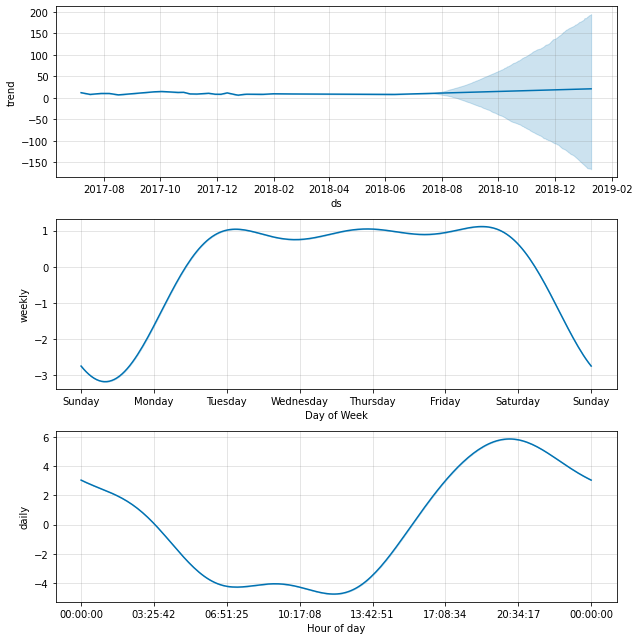

In [32]:
fig2 = prophet_model.plot_components(prophet_forecast)

In [ ]:
# Ok it seems to follow what we expect for the weekends but may not follow what we're expecting for the other two


In [ ]:
onwards_test_date_reduced.

In [35]:
prophet_forecast_reduced = prophet_forecast.loc[:, ['ds', 'yhat']]

In [36]:
prophet_forecast_reduced['timestamp_changed'] = prophet_forecast_reduced['ds'].transform(lambda x: pd.Timestamp(x))

In [37]:
#onwards_compare = onwards_test_date.loc[:, ['time', 'energy']]
#onwards_compare['time'] = onwards_compare['time'].transform(lambda x: x[0:-6])
#onwards_compare = onwards_compare.rename({'time': 'ds', 'energy': 'yhat'}, axis = 1)
onwards_test_date_reduced['timestamp_changed'] = onwards_test_date_reduced['ds'].transform(lambda x: pd.Timestamp(x))

In [38]:
onwards_test_date_reduced.head(5)

,ds,y,timestamp_changed
0,2018-09-03T01:02:18,9.038064,2018-09-03 01:02:18
1,2018-09-03T01:09:23,9.020124,2018-09-03 01:09:23
2,2018-09-03T01:16:28,8.966305,2018-09-03 01:16:28
3,2018-09-03T01:23:32,9.121355,2018-09-03 01:23:32
4,2018-09-03T01:30:36,8.978479,2018-09-03 01:30:36


In [39]:
onwards_test_date_reduced.shape

(188633, 3)

In [40]:
pre_test_date_reduced.shape

(437044, 3)

In [41]:
merge_test = prophet_forecast_reduced.merge(onwards_test_date_reduced, left_on = 'timestamp_changed', right_on = 'timestamp_changed')

In [42]:
merge_test

,ds_x,yhat,timestamp_changed,ds_y,y
0,2018-08-19 23:47:40,13.798828,2018-08-19 23:47:40,2018-08-19T23:47:40,9.840562
1,2018-08-19 23:47:40,13.798828,2018-08-19 23:47:40,2018-08-19T23:47:40,30.443329
2,2018-08-19 23:47:40,13.798828,2018-08-19 23:47:40,2018-08-19T23:47:40,14.192031
3,2018-08-19 23:47:40,13.798828,2018-08-19 23:47:40,2018-08-19T23:47:40,9.711402
4,2018-08-19 23:47:40,13.798828,2018-08-19 23:47:40,2018-08-19T23:47:40,2.587140
...,...,...,...,...,...
666,2019-01-03 13:52:40,18.339066,2019-01-03 13:52:40,2019-01-03T13:52:40,0.000000
667,2019-01-03 13:52:40,18.339066,2019-01-03 13:52:40,2019-01-03T13:52:40,1.082106
668,2019-01-03 13:52:40,18.339066,2019-01-03 13:52:40,2019-01-03T13:52:40,1.110293
669,2019-01-03 13:52:40,18.339066,2019-01-03 13:52:40,2019-01-03T13:52:40,10.899280


In [43]:
merge_test['yhat'].nunique() # there's only 77 unique valhyes

77

In [44]:
no_duplicates = merge_test.drop_duplicates(subset=['ds_x', 'yhat'], keep = 'first')

,ds_x,yhat,timestamp_changed,ds_y,y
0,2018-08-19 23:47:40,13.798828,2018-08-19 23:47:40,2018-08-19T23:47:40,9.840562
9,2018-08-22 22:22:40,17.969757,2018-08-22 22:22:40,2018-08-22T22:22:40,17.506711
18,2018-08-24 06:37:40,9.460525,2018-08-24 06:37:40,2018-08-24T06:37:40,0.000000
27,2018-08-24 21:17:40,18.827332,2018-08-24 21:17:40,2018-08-24T21:17:40,9.595517
36,2018-08-26 12:57:40,5.360984,2018-08-26 12:57:40,2018-08-26T12:57:40,10.053308
...,...,...,...,...,...
634,2019-01-02 01:42:40,23.286857,2019-01-02 01:42:40,2019-01-02T01:42:40,9.363716
643,2019-01-02 10:32:40,17.127351,2019-01-02 10:32:40,2019-01-02T10:32:40,0.000000
652,2019-01-02 17:52:40,25.764684,2019-01-02 17:52:40,2019-01-02T17:52:40,9.487824
661,2019-01-03 05:32:40,18.387584,2019-01-03 05:32:40,2019-01-03T05:32:40,10.397932


In [48]:
onwards_test_date_reduced.loc[onwards_test_date_reduced['timestamp_changed'] == pd.Timestamp('2018-08-19T23:47:40')]

,ds,y,timestamp_changed
11475,2018-08-19T23:47:40,9.840562,2018-08-19 23:47:40
11897,2018-08-19T23:47:40,30.443329,2018-08-19 23:47:40
29696,2018-08-19T23:47:40,14.192031,2018-08-19 23:47:40
50045,2018-08-19T23:47:40,9.711402,2018-08-19 23:47:40
90470,2018-08-19T23:47:40,2.587140,2018-08-19 23:47:40
117234,2018-08-19T23:47:40,1.100667,2018-08-19 23:47:40
156223,2018-08-19T23:47:40,0.803533,2018-08-19 23:47:40
168649,2018-08-19T23:47:40,10.666441,2018-08-19 23:47:40
171139,2018-08-19T23:47:40,20.133840,2018-08-19 23:47:40


In [ ]:
# this dataset introduces duplicate measurements from each of the floors but it also has multiple duplicates

# per floor -- should we train on each or how should we do this?

In [ ]:
# I'm very confused why there's duplicates here??? Need to clear these up and see which y values are causing this